In [1]:
import os
import numpy as np
import pandas as pd
from scroutines.config_plots import *

In [2]:
ddir = '/u/home/f/f7xiesnm/project-zipursky/easifish/lt186/proc/r1'
!ls $ddir
# n5dir = '/data/qlyu/v1/data/easifish/lt186/r1/stitching/export.n5'
f1 = os.path.join(ddir, 'roi.csv')
f2 = os.path.join(ddir, 'spotcount.csv') #_intn.csv')

roi_all.csv  roi.csv  spotcount.csv  spotcount_intn.csv  spotcount_merged.csv


In [3]:
def rot2d(x, y, theta):
    """ rotate by theta
    """
    theta_rad = theta/180*np.pi
    R  = np.array([[np.cos(theta_rad), -np.sin(theta_rad),],
                   [np.sin(theta_rad),  np.cos(theta_rad),],
                  ])
    xy = np.vstack([x,y])
    xyr = R.dot(xy) 
    return xyr[0], xyr[1]


In [4]:
def plot_easifish_proj(df, x, y, hue='lbl_v2', na_rep='NA', invert_yaxis=False, figsize=(8,8)):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=df, 
                    x=x, y=y, color='lightgray', s=2, edgecolor='none')
    sns.scatterplot(data=df[df[hue]!=na_rep], 
                    x=x, y=y, hue=hue, palette=palette, s=5, edgecolor='none')
    if invert_yaxis:
        ax.invert_yaxis()
        
    ax.grid(False)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

In [5]:
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)
df  = df1.join(df2)

In [6]:
amin, amax = 500, 5000
cond = ((df['area'] < amax) & (df['area'] > amin))
df = df[cond]

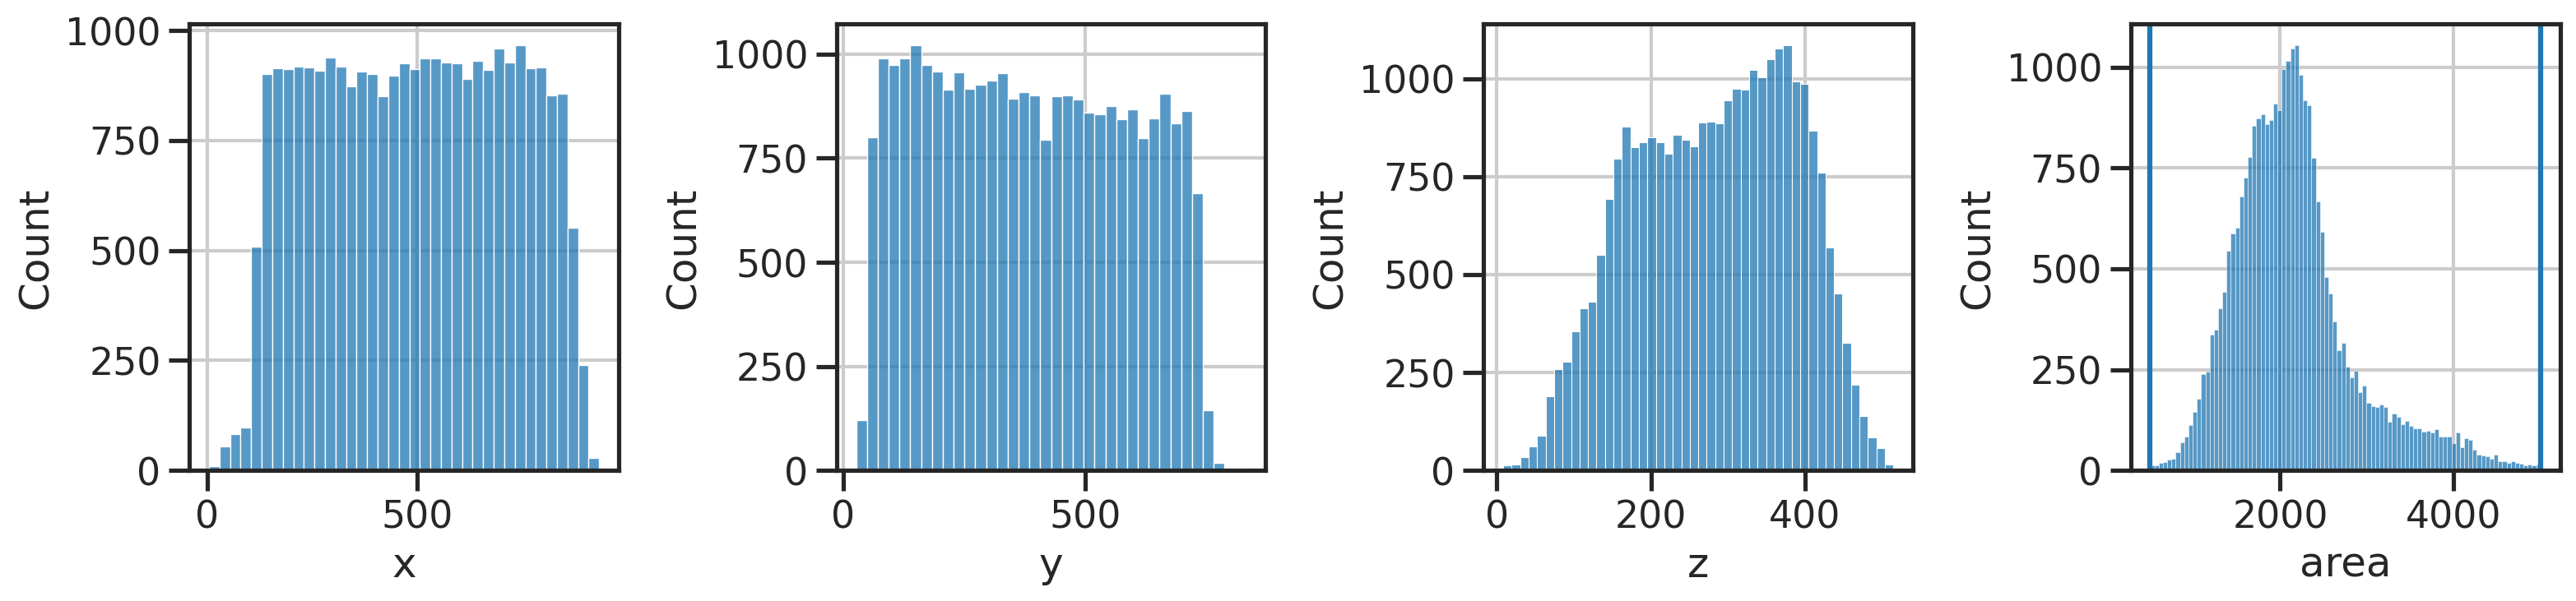

In [7]:
# cell level stats
fig, axs = plt.subplots(1,4,figsize=(4*4,1*4))
ax = axs[0]
sns.histplot(df['x'].values, ax=ax)
ax.set_xlabel('x')
ax = axs[1]
sns.histplot(df['y'].values, ax=ax)
ax.set_xlabel('y')
ax = axs[2]
sns.histplot(df['z'].values, ax=ax)
ax.set_xlabel('z')
ax = axs[3]
sns.histplot(df['area'].values, ax=ax)
ax.set_xlabel('area')
ax.axvline(amin)
ax.axvline(amax)
fig.tight_layout()
plt.show()

In [8]:
df.describe()

z             y             x          area         r1_c0  \
count  28004.000000  28004.000000  28004.000000  28004.000000  28004.000000   
mean     282.341452    386.399347    494.997803   2160.368338      3.294458   
std      102.790383    201.140542    223.533997    704.825133     12.277848   
min        8.210331     26.664865      4.164600    502.660032      0.000000   
25%      199.225670    210.137105    301.664880   1694.966784      0.000000   
50%      289.607430    379.455886    497.608385   2075.338944      0.000000   
75%      367.135745    559.250769    688.085938   2443.624512      1.000000   
max      514.876611    833.382355    933.956930   4998.872256    286.000000   

              r1_c2  
count  28004.000000  
mean       1.960541  
std        8.039055  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      185.000000

In [9]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# df[['xr', 'yr', 'zr']]= pca.fit_transform(df[['x', 'y', 'z']])

In [10]:
channels = [
    'r1_c0',  'r1_c2',
]
genes = [
    'RL (Cre)',
    'LM (FlpO)',
]

In [11]:
def rename(code):
    rename_dict = {
        0: 'NA', 
        1: 'RL', 
        2: 'LM', 
        3: 'both'}
    return rename_dict[code]

df = df.copy()
th_c0 = 10 
th_c2 = 8 
df['bi_r1_c0'] = df['r1_c0'] > th_c0 
df['bi_r1_c2'] = df['r1_c2'] > th_c2 
df['lbl'] = df['bi_r1_c0'].astype(int) + 2*df['bi_r1_c2'].astype(int)
df['lbl_v2'] = df['lbl'].apply(rename)
np.unique(df['lbl'].values)
np.unique(df['lbl_v2'].values)


array(['LM', 'NA', 'RL', 'both'], dtype=object)

In [12]:
sns.color_palette('tab10', 10)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [13]:
palette = {
    'NA': 'lightgray', 
    'LM': 'C3', 
    'RL': 'C0', 
    'both': 'C6', 
}

In [14]:
df.value_counts('lbl_v2')

lbl_v2
NA      24602
RL       1702
LM       1373
both      327
dtype: int64

In [15]:
a = df.value_counts('lbl_v2')
print(a/len(df)*100, "\n")

print(f"both in LM (%): {a.loc['both']/(a.loc['both']+a.loc['LM'])*100:.1f}")
print(f"both in RL (%): {a.loc['both']/(a.loc['both']+a.loc['RL'])*100:.1f}")
print(f"RL/LM (%): {(a.loc['both']+a.loc['RL'])/(a.loc['both']+a.loc['LM'])*100:.1f}")

lbl_v2
NA      87.851735
RL       6.077703
LM       4.902871
both     1.167690
dtype: float64 

both in LM (%): 19.2
both in RL (%): 16.1
RL/LM (%): 119.4


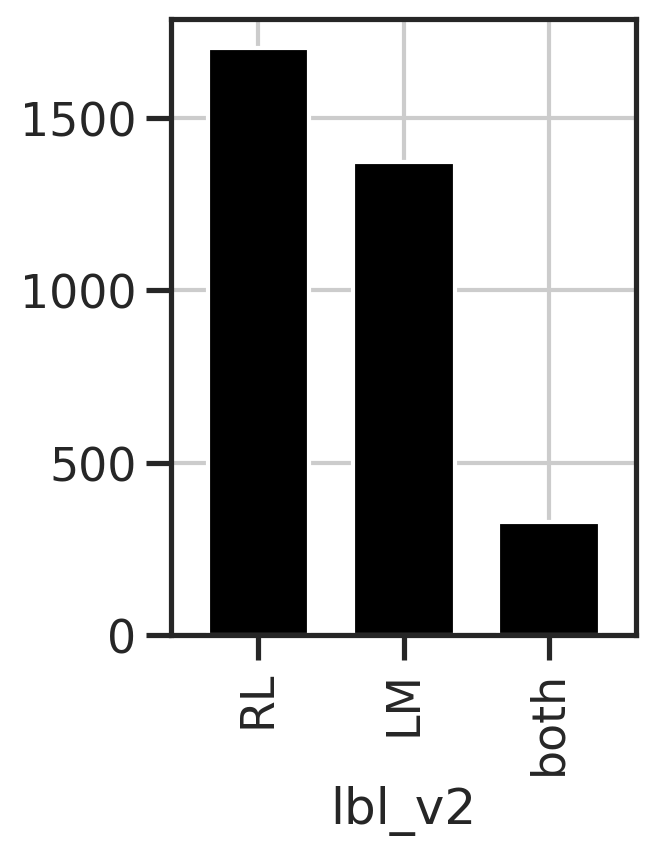

In [16]:
fig, ax = plt.subplots(figsize=(3,4))
df[df['lbl_v2']!='NA'].value_counts('lbl_v2').plot.bar(width=0.7, color='black')
plt.show()

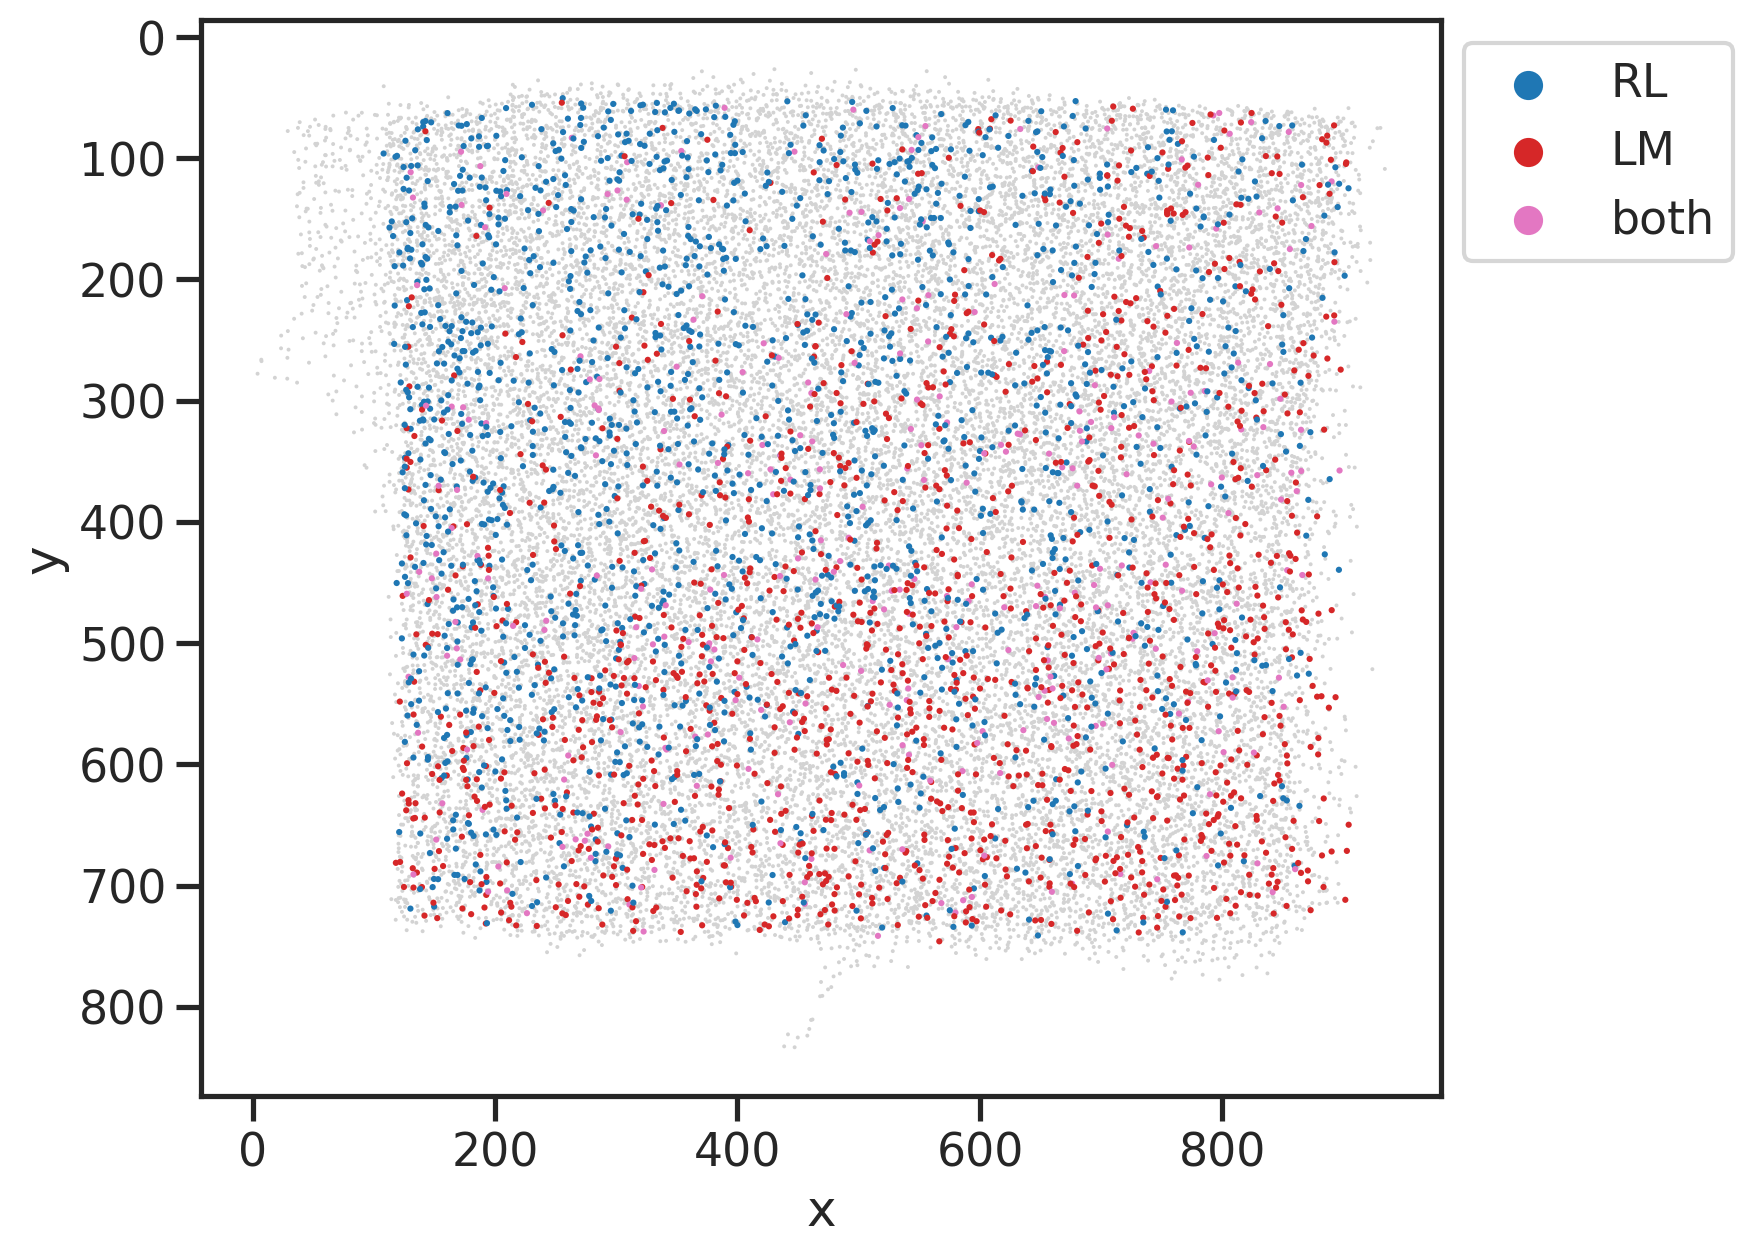

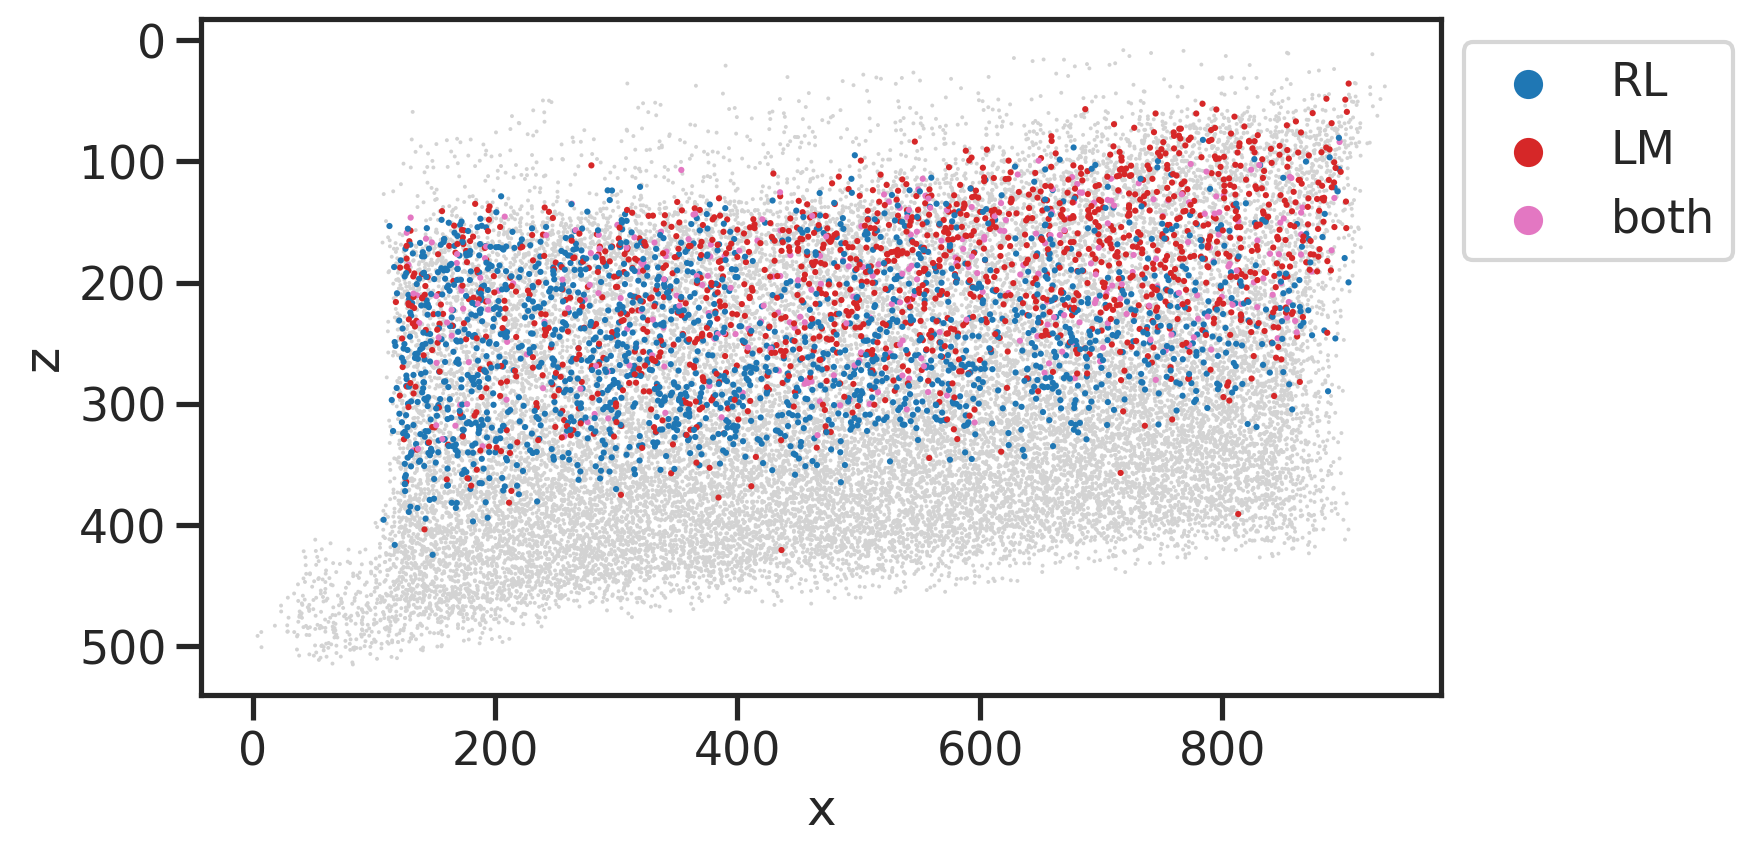

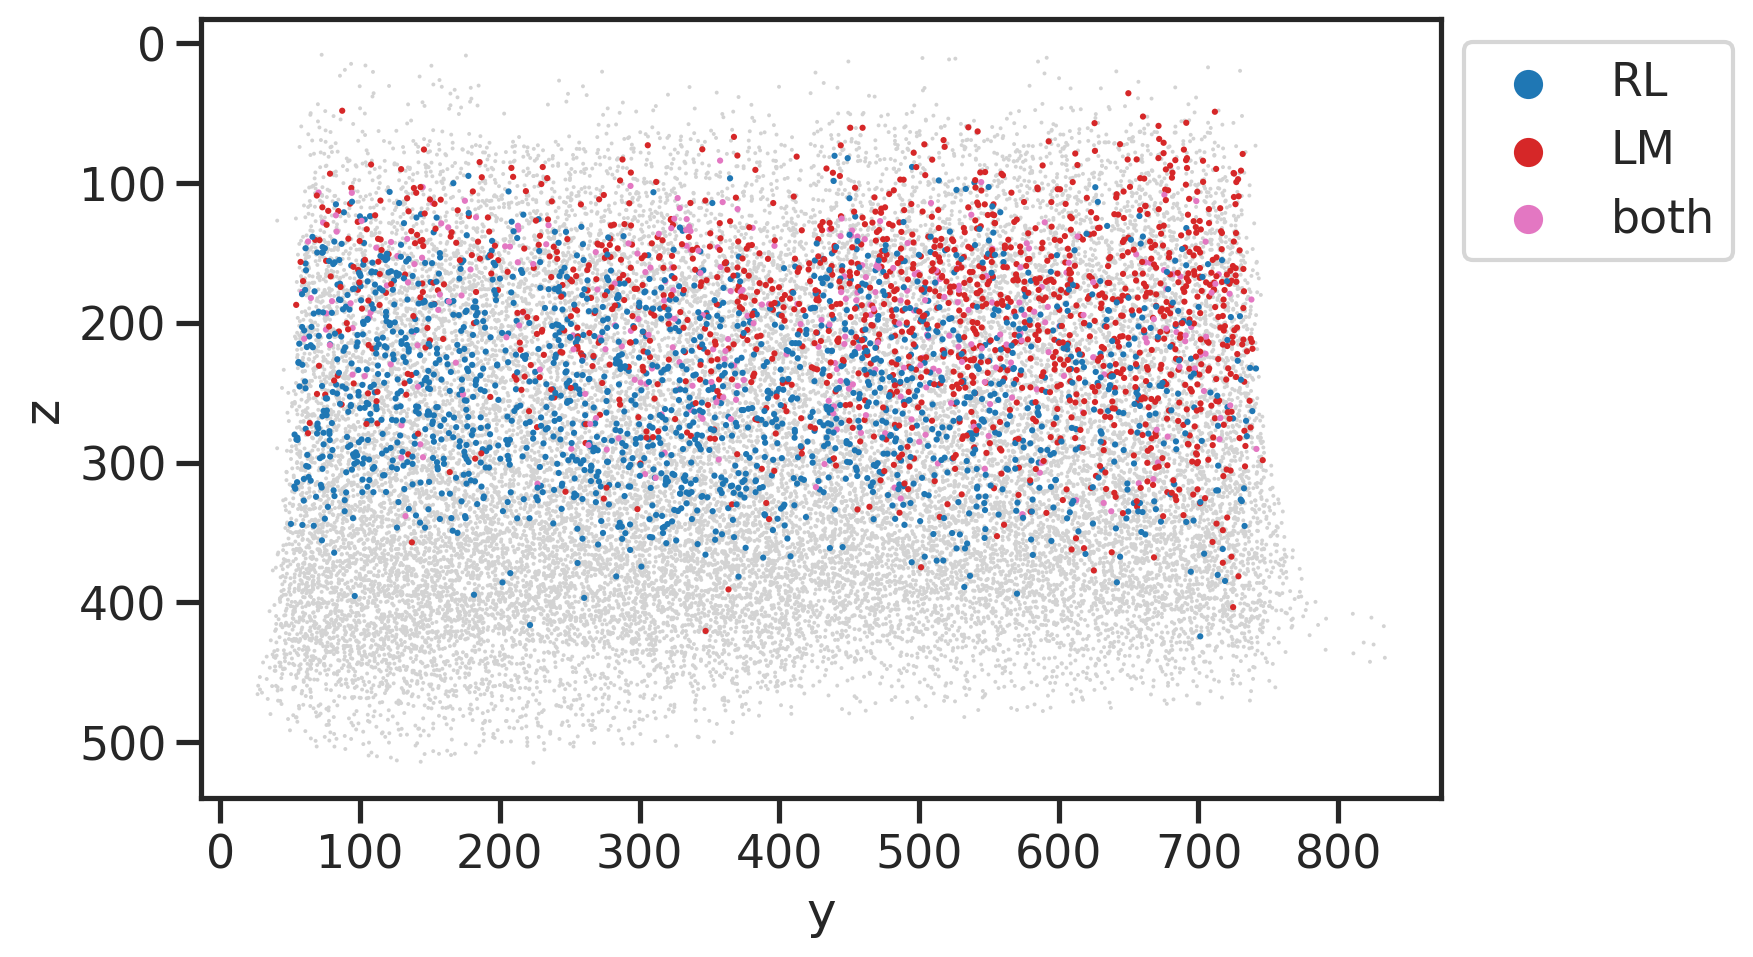

In [17]:
plot_easifish_proj(df, 'x', 'y', invert_yaxis=True)
plot_easifish_proj(df, 'x', 'z', invert_yaxis=True)
plot_easifish_proj(df, 'y', 'z', invert_yaxis=True)

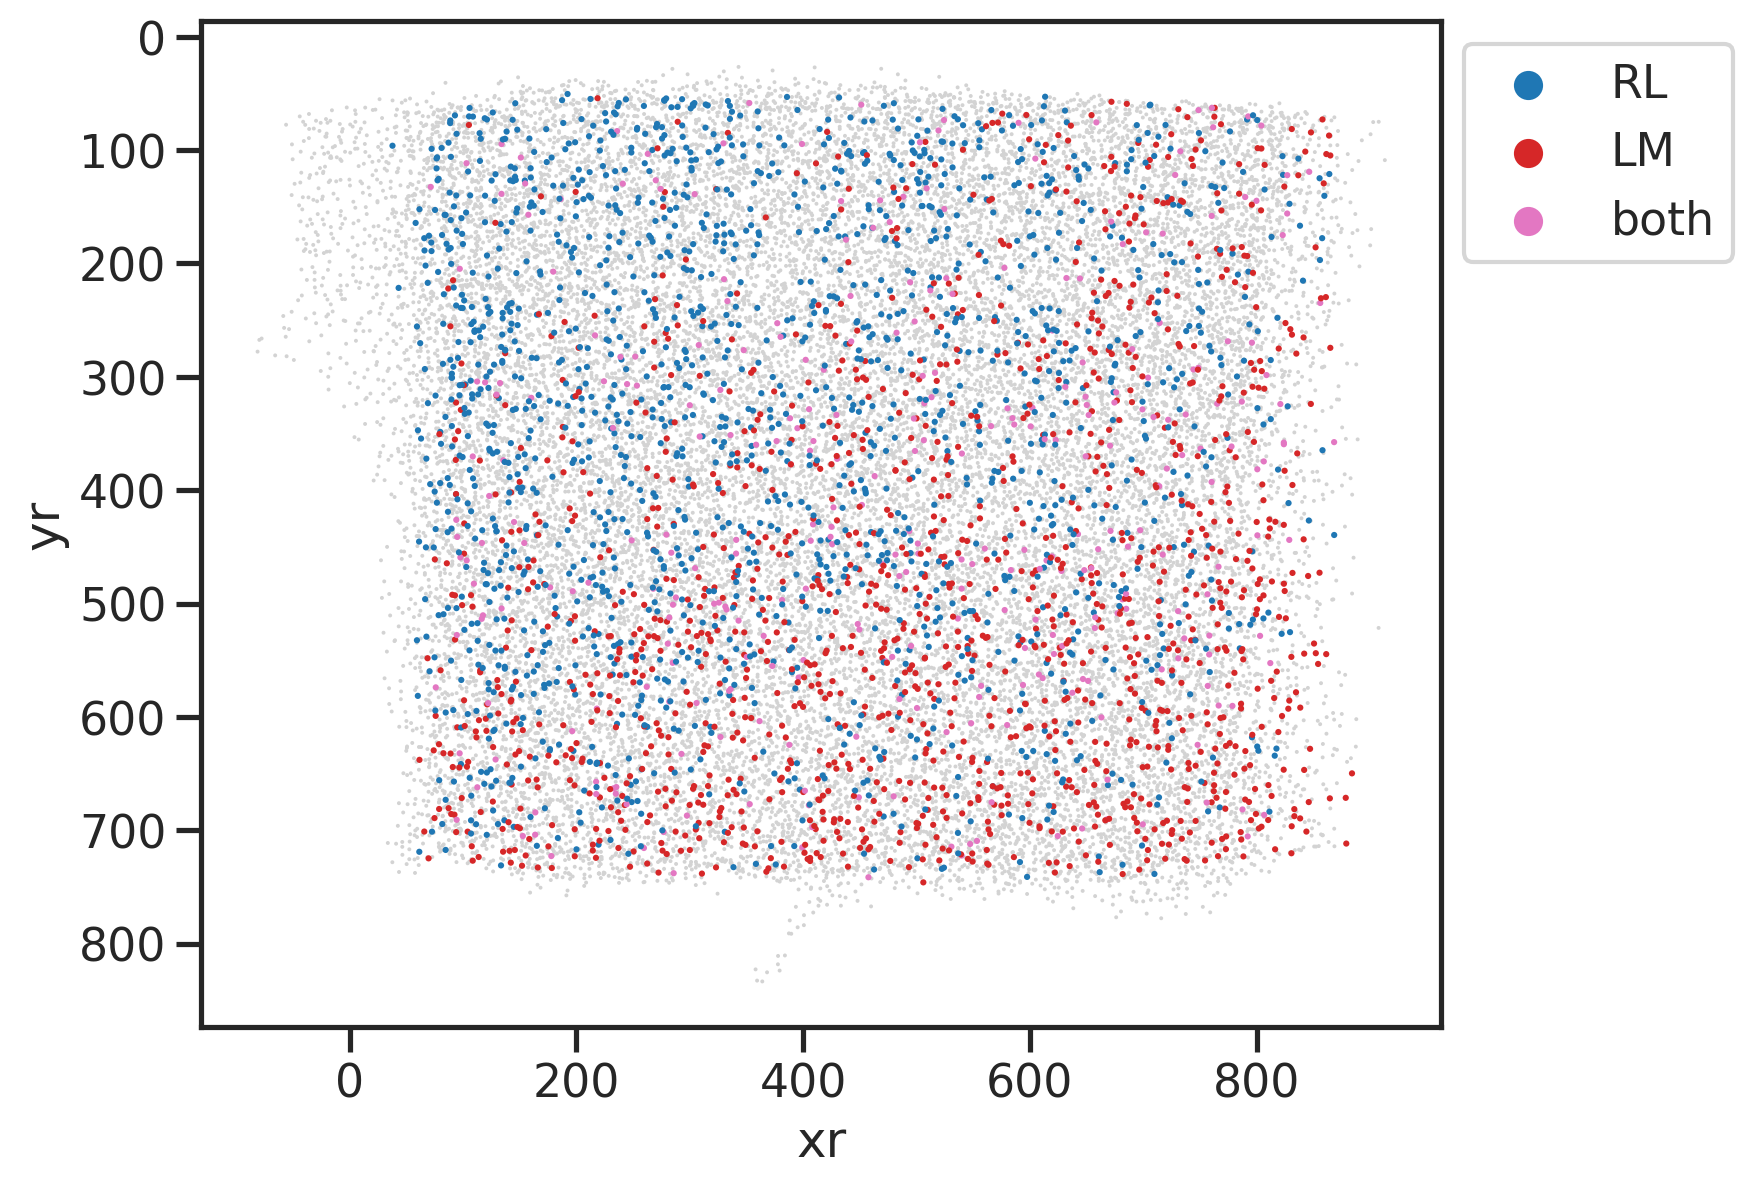

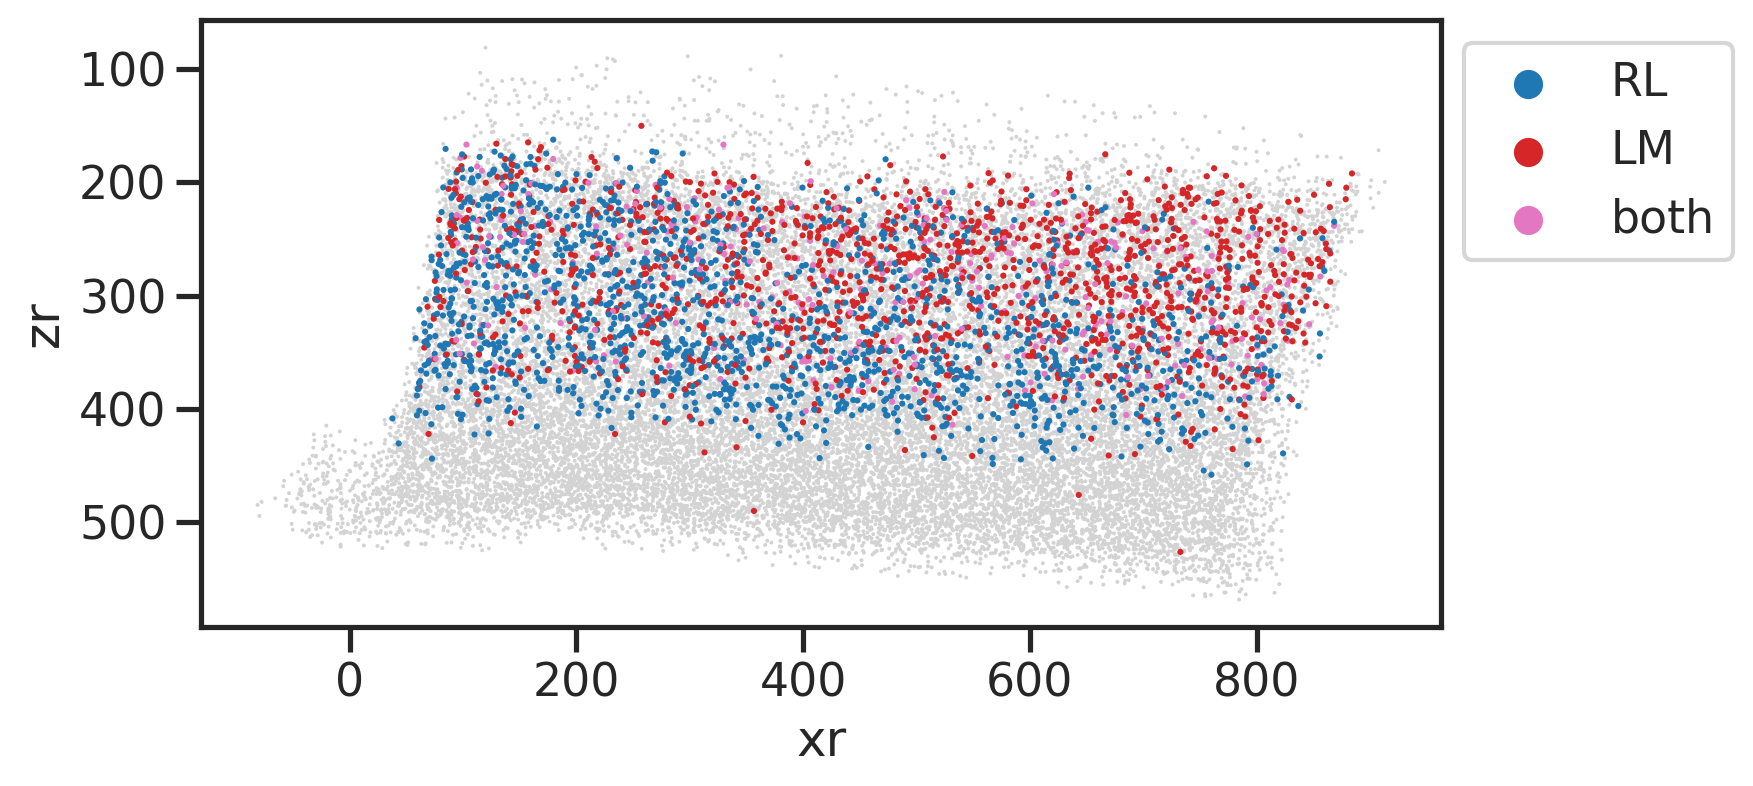

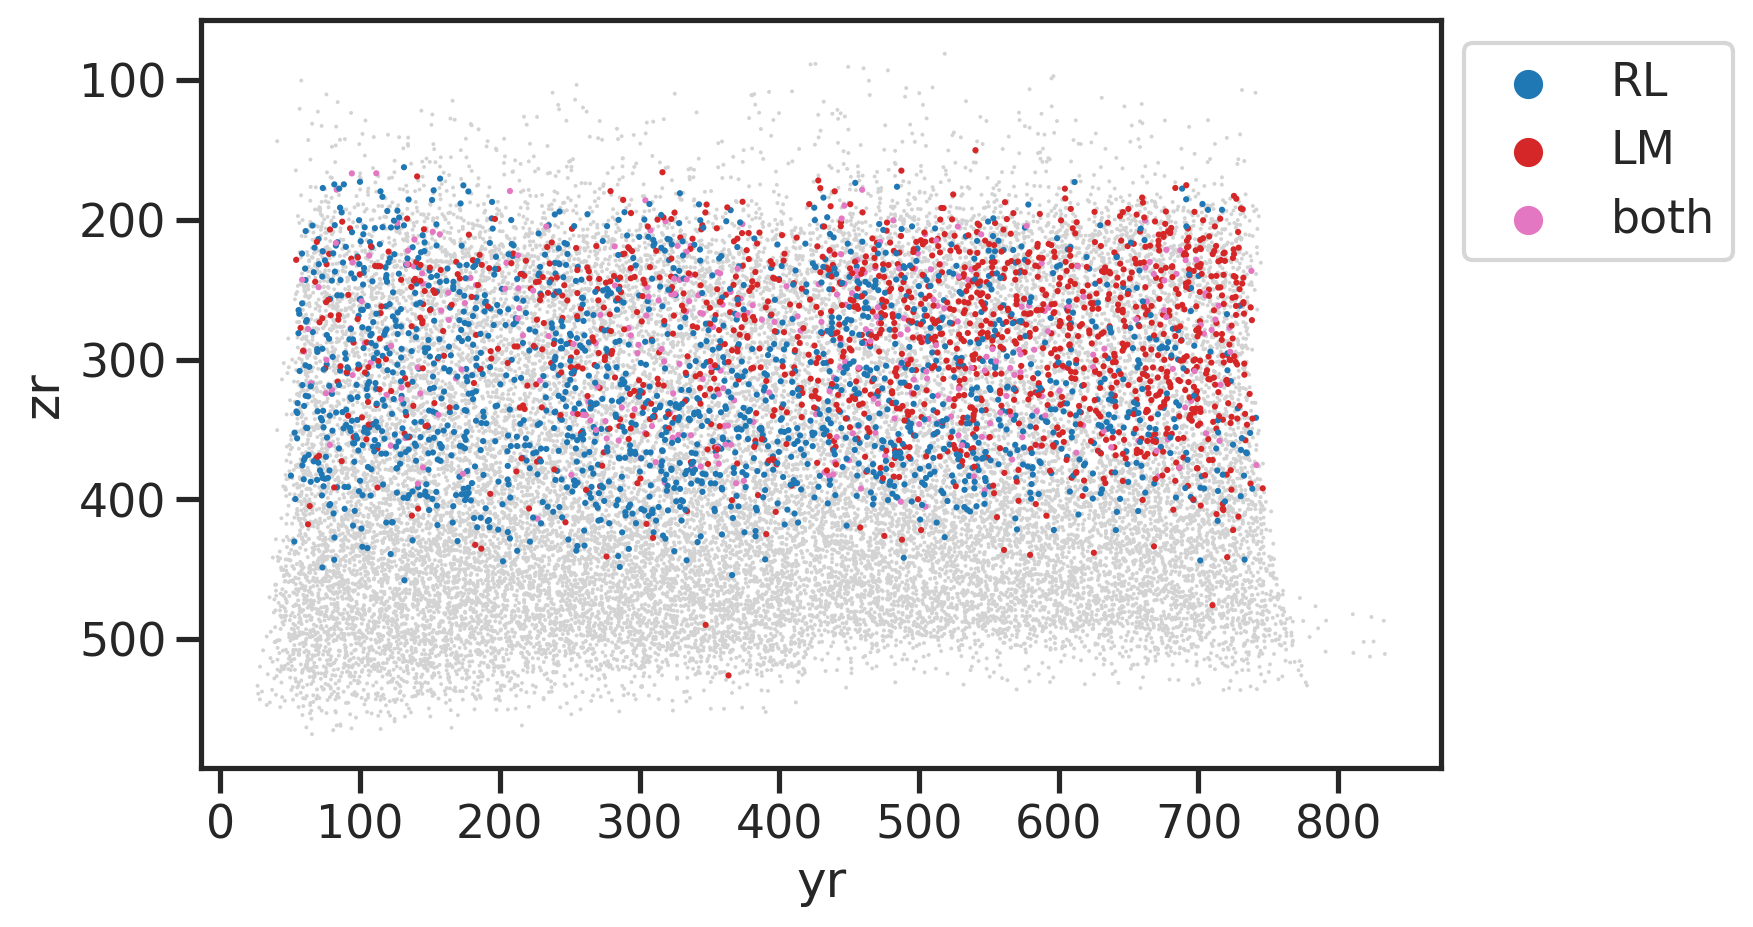

In [18]:
df['yr'] = df['y']
df['xr'], df['zr'] = rot2d(df['x'], df['z'], 10)

plot_easifish_proj(df, 'xr', 'yr', invert_yaxis=True)
plot_easifish_proj(df, 'xr', 'zr', invert_yaxis=True)
plot_easifish_proj(df, 'yr', 'zr', invert_yaxis=True)

In [19]:
xmin, ymin, zmin = df[['xr', 'yr', 'zr']].min()
xmax, ymax, zmax = df[['xr', 'yr', 'zr']].max()
print(xmin, ymin, zmin)
print(xmax, ymax, zmax)

step = 25
xbins = np.arange(0, xmax+step, step).astype(int)
ybins = np.arange(0, ymax+step, step).astype(int)
zbins = np.arange(0, zmax+step, step).astype(int)
print(xbins, ybins, zbins, xbins.shape, ybins.shape, zbins.shape)

df['xrbin'] = pd.cut(df['xr'], bins=xbins, labels=False) #.astype(int)
df['yrbin'] = pd.cut(df['yr'], bins=ybins, labels=False)
df['zrbin'] = pd.cut(df['zr'], bins=zbins, labels=False)
df

-81.2171653924144 26.664865403788635 81.15638521728421
913.1552953398493 833.3823549144583 568.0848052739302
[  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875
 900 925] [  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850] [  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575] (38,) (35,) (24,)


z           y           x         area  r1_c0  r1_c2  \
roi                                                                    
1      223.381698  118.023524  345.738751  2663.316096   27.0    4.0   
2      168.712415  365.227001  155.285191  3824.339904   65.0    0.0   
3      354.251797  140.049249  504.988163  2813.332032    1.0    0.0   
4      498.298442  165.682851   64.912608  2573.733120    0.0    0.0   
5      181.096767   71.323709  379.952383  3434.725056    2.0    0.0   
...           ...         ...         ...          ...    ...    ...   
28224   82.788737  479.759067  898.320341  1249.895808    0.0    0.0   
28225  280.886322  481.080502  796.140414   962.661504    0.0    0.0   
28226  317.530425  538.178367  492.551535  1088.504256    0.0    0.0   
28227   92.072529  253.880894  134.486927  2927.088192    0.0    0.0   
28228  229.877528  308.873387  182.145233   885.876096    0.0    0.0   

       bi_r1_c0  bi_r1_c2  lbl lbl_v2          yr          xr          zr  \
roi                                                                         
1          True     False    1     RL  118.023524  301.696377  280.024932   
2          True     False    1     RL  365.227001  123.629456  193.114285   
3         False     False    0     NA  140.049249  435.801079  436.560190   
4         False     False    0     NA  165.682851  -22.602177  502.000125   
5         False     False    0     NA   71.323709  342.732929  244.323539   
...         ...       ...  ...    ...         ...         ...         ...   
28224     False     False    0     NA  479.759067  870.296723  237.522680   
28225     False     False    0     NA  481.080502  735.269854  414.867360   
28226     False     False    0     NA  538.178367  429.929991  398.237100   
28227     False     False    0     NA  253.880894  116.455542  114.027150   
28228     False     False    0     NA  308.873387  139.460224  258.014360   

       xrbin  yrbin  zrbin  
roi                         
1       12.0      4     11  
2        4.0     14      7  
3       17.0      5     17  
4        NaN      6     20  
5       13.0      2      9  
...      ...    ...    ...  
28224   34.0     19      9  
28225   29.0     19     16  
28226   17.0     21     15  
28227    4.0     10      4  
28228    5.0     12     10  

[28004 rows x 16 columns]

In [20]:
step = 50
xbins2 = np.arange(0, xmax+step, step).astype(int)
ybins2 = np.arange(0, ymax+step, step).astype(int)
zbins2 = np.arange(0, zmax+step, step).astype(int)
print(xbins2, ybins2, zbins2, xbins2.shape, ybins2.shape, zbins2.shape)

df[f'xrbin_s{step}'] = pd.cut(df['xr'], bins=xbins2, labels=False) #.astype(int)
df[f'yrbin_s{step}'] = pd.cut(df['yr'], bins=ybins2, labels=False)
df[f'zrbin_s{step}'] = pd.cut(df['zr'], bins=zbins2, labels=False)

[  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950] [  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850] [  0  50 100 150 200 250 300 350 400 450 500 550 600] (20,) (18,) (13,)


In [21]:
step = 100
xbins3 = np.arange(0, xmax+step, step).astype(int)
ybins3 = np.arange(0, ymax+step, step).astype(int)
zbins3 = np.arange(0, zmax+step, step).astype(int)
print(xbins3, ybins3, zbins3, xbins3.shape, ybins3.shape, zbins3.shape)

df[f'xrbin_s{step}'] = pd.cut(df['xr'], bins=xbins3, labels=False) #.astype(int)
df[f'yrbin_s{step}'] = pd.cut(df['yr'], bins=ybins3, labels=False)
df[f'zrbin_s{step}'] = pd.cut(df['zr'], bins=zbins3, labels=False)

[   0  100  200  300  400  500  600  700  800  900 1000] [  0 100 200 300 400 500 600 700 800 900] [  0 100 200 300 400 500 600] (11,) (10,) (7,)


In [22]:
dfsize_x = df.groupby(['xrbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()
dfsize_y = df.groupby(['yrbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()
dfsize_z = df.groupby(['zrbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()



In [23]:
dfsize_s100 = df.groupby(['xrbin_s100', 'yrbin_s100',  'zrbin_s100', 'lbl_v2']).size() # .unstack().fillna(0) #mean().unstack()
dfsize_s100

xrbin_s100  yrbin_s100  zrbin_s100  lbl_v2
0.0         0           1           NA         3
                                    RL         1
                        2           NA        12
                                    RL         5
                        3           NA        31
                                              ..
8.0         7           4           NA         2
9.0         0           2           NA         3
            1           1           NA         2
                        2           NA         1
            5           1           NA         1
Length: 867, dtype: int64

In [24]:

# xz
dfsize_xz1 = df[df['lbl_v2']=='LM'].groupby(['xrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz1 = dfsize_xz1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz1 = dfsize_xz1.fillna(0).astype(int)

dfsize_xz2 = df[df['lbl_v2']=='RL'].groupby(['xrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz2 = dfsize_xz2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz2 = dfsize_xz2.fillna(0).astype(int)

dfsize_xz3 = df[df['lbl_v2']=='both'].groupby(['xrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz3 = dfsize_xz3.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz3 = dfsize_xz3.fillna(0).astype(int)

# yz
dfsize_yz1 = df[df['lbl_v2']=='LM'].groupby(['yrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz1 = dfsize_yz1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz1 = dfsize_yz1.fillna(0).astype(int)

dfsize_yz2 = df[df['lbl_v2']=='RL'].groupby(['yrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz2 = dfsize_yz2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz2 = dfsize_yz2.fillna(0).astype(int)

dfsize_yz3 = df[df['lbl_v2']=='both'].groupby(['yrbin', 'zrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz3 = dfsize_yz3.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz3 = dfsize_yz3.fillna(0).astype(int)

# xy
dfsize_xy1 = df[df['lbl_v2']=='LM'].groupby(['xrbin', 'yrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy1 = dfsize_xy1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy1 = dfsize_xy1.fillna(0).astype(int)

dfsize_xy2 = df[df['lbl_v2']=='RL'].groupby(['xrbin', 'yrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy2 = dfsize_xy2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy2 = dfsize_xy2.fillna(0).astype(int)

dfsize_xy3 = df[df['lbl_v2']=='both'].groupby(['xrbin', 'yrbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy3 = dfsize_xy3.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy3 = dfsize_xy3.fillna(0).astype(int)

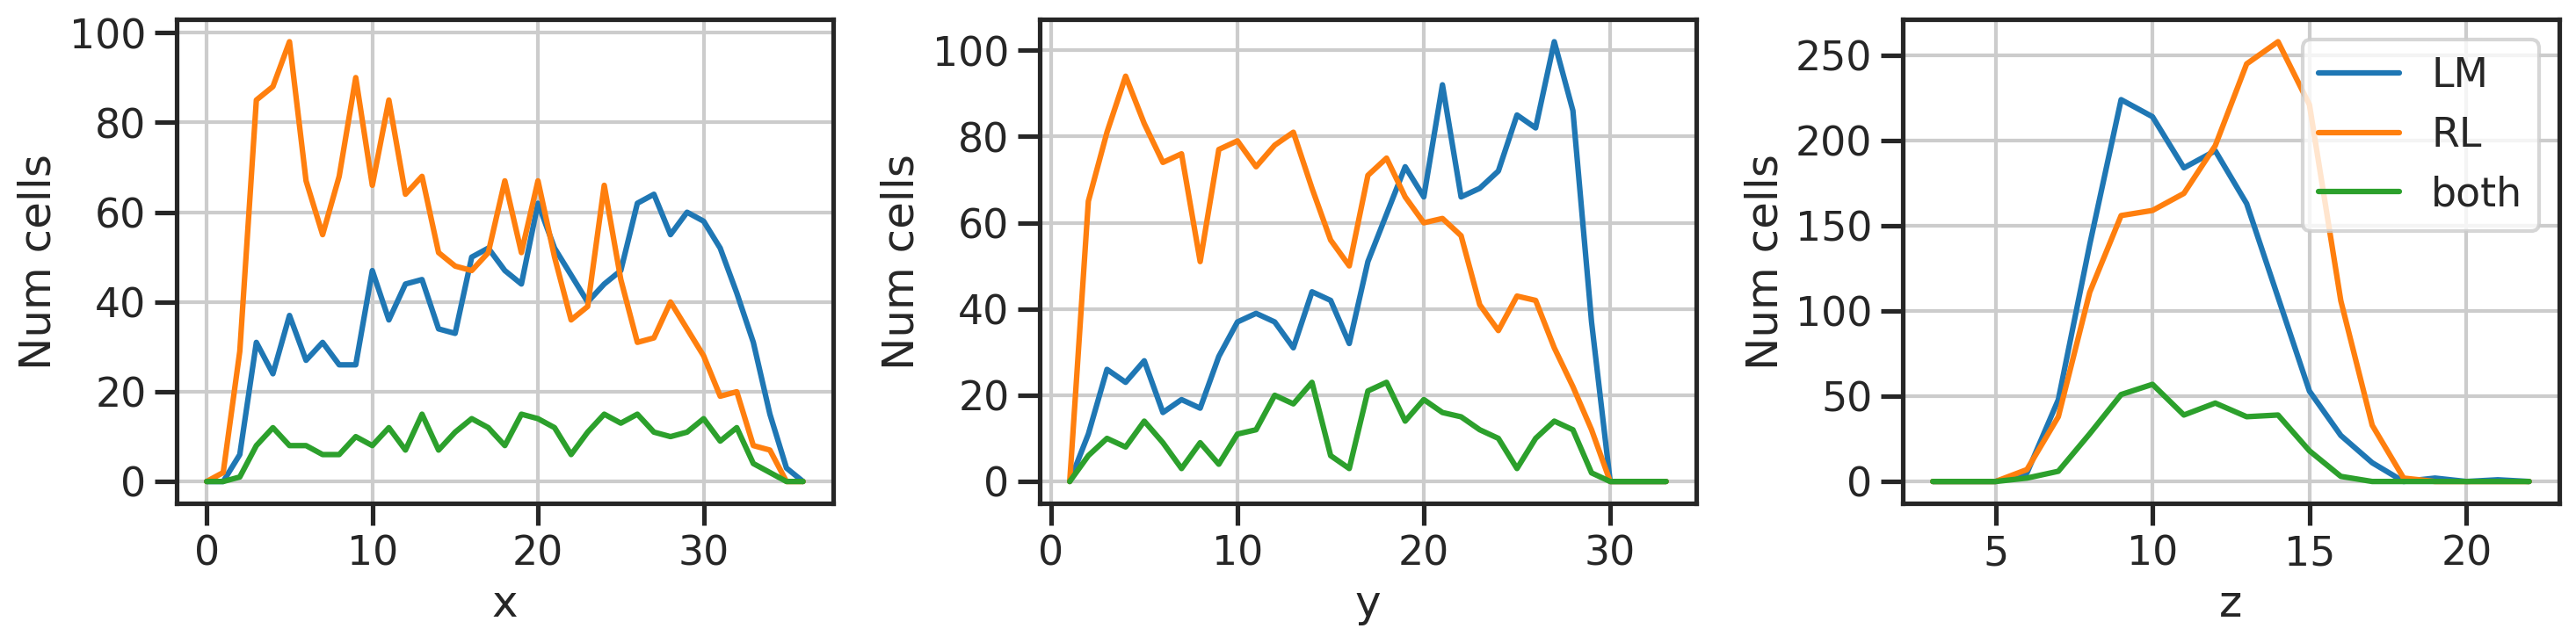

In [25]:
fig, axs = plt.subplots(1,3,figsize=(3*5,1*4))
ax = axs[0]
ax.plot(dfsize_x['LM'], label='LM')
ax.plot(dfsize_x['RL'], label='RL')
ax.plot(dfsize_x['both'], label='both')
ax.set_xlabel('x')
ax.set_ylabel('Num cells')

ax = axs[1]
ax.plot(dfsize_y['LM'], label='LM')
ax.plot(dfsize_y['RL'], label='RL')
ax.plot(dfsize_y['both'], label='both')
ax.set_xlabel('y')
ax.set_ylabel('Num cells')

ax = axs[2]
ax.plot(dfsize_z['LM'], label='LM')
ax.plot(dfsize_z['RL'], label='RL')
ax.plot(dfsize_z['both'], label='both')
ax.set_xlabel('z')
ax.set_ylabel('Num cells')
ax.legend()

fig.tight_layout()

Text(0, 0.5, 'Frac. labeled cells')

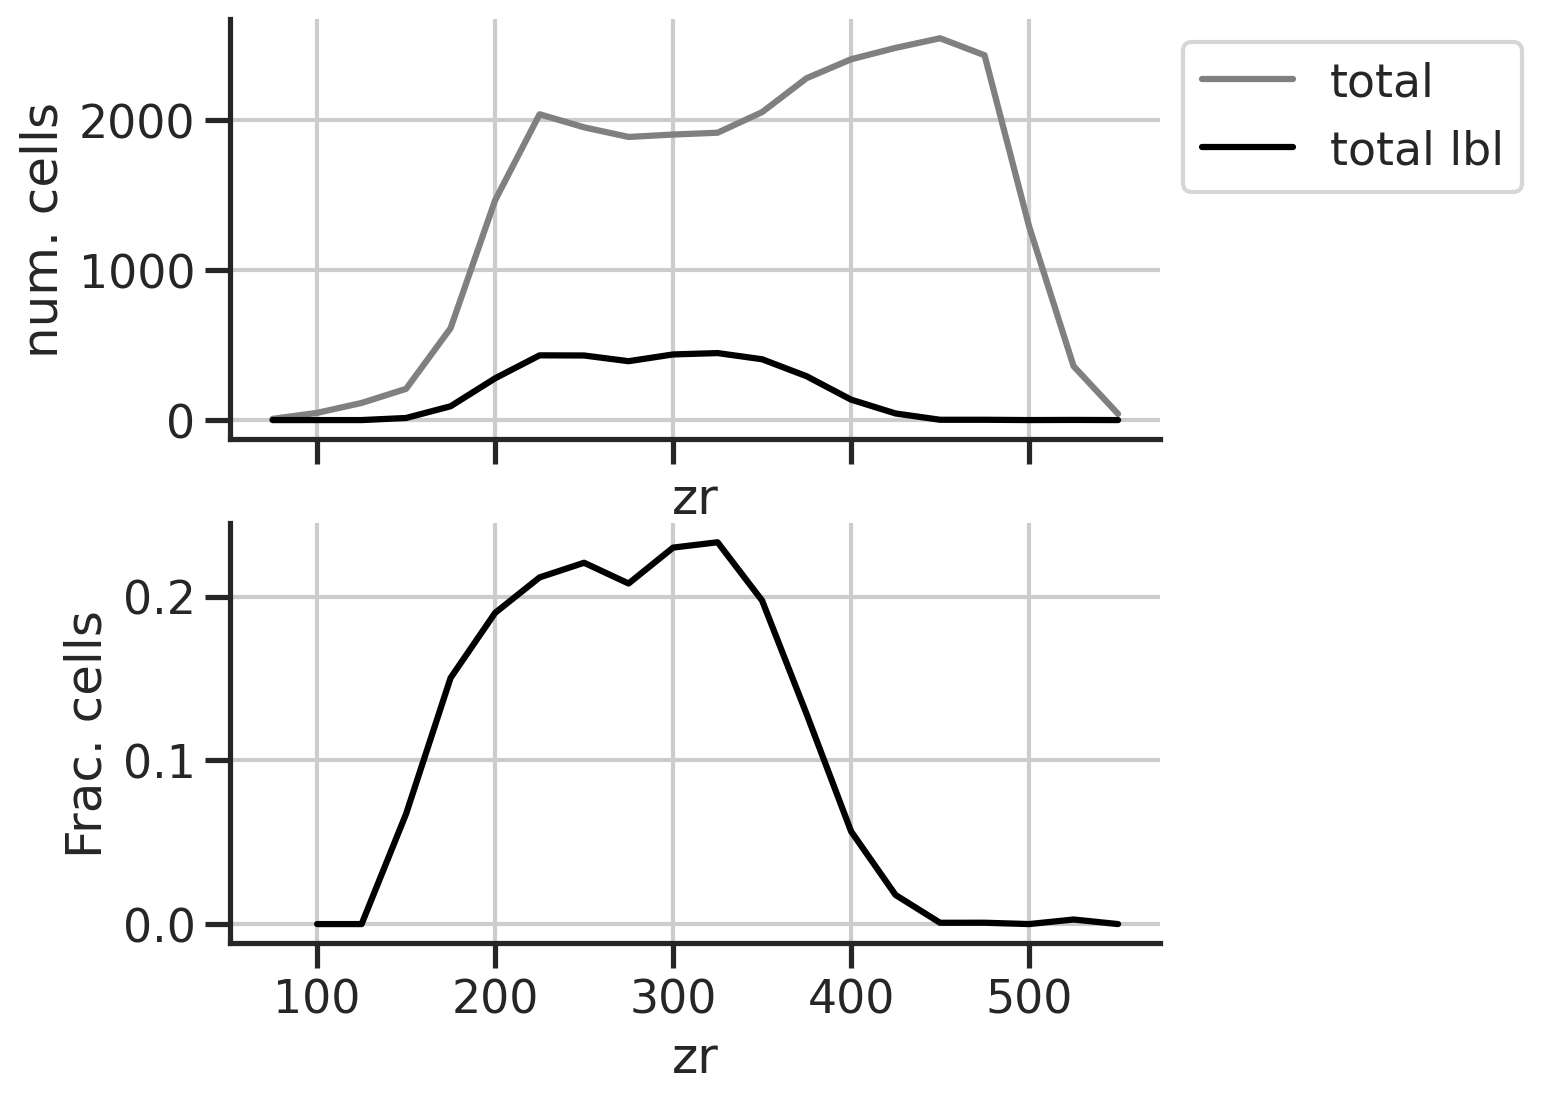

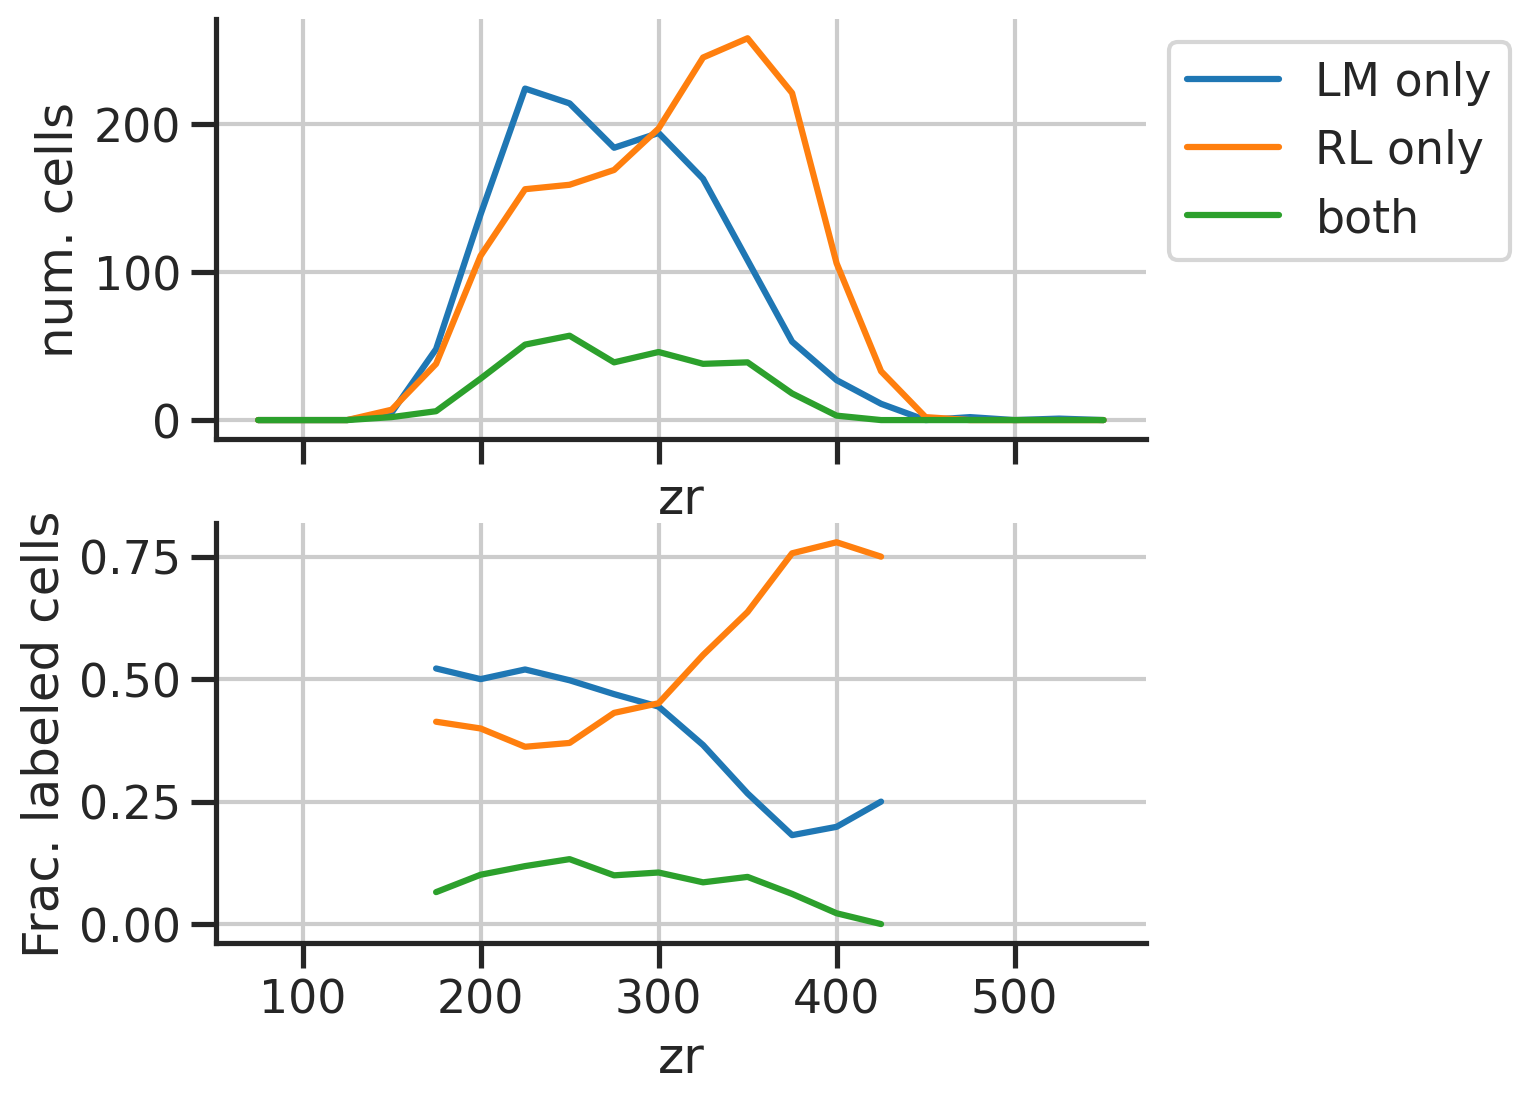

In [26]:
total = dfsize_z.sum(axis=1)
total_lbl = dfsize_z['LM']+dfsize_z['RL']+dfsize_z['both']

fig, axs = plt.subplots(2,1,figsize=(1*6,2*3), sharex=True)
ax = axs[0]
ax.plot(zbins[dfsize_z.index], total, label='total', color='gray')
ax.plot(zbins[dfsize_z.index], total_lbl, label='total lbl', color='k')
sns.despine(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('zr')
ax.set_ylabel('num. cells')

ax = axs[1]
cond = total > 20
ax.plot(zbins[dfsize_z.index][cond], (total_lbl/(total))[cond], color='k')
sns.despine(ax=ax)
ax.set_xlabel('zr')
ax.set_ylabel('Frac. cells')

fig, axs = plt.subplots(2,1,figsize=(1*6,2*3), sharex=True)
ax = axs[0]
ax.plot(zbins[dfsize_z.index], dfsize_z['LM'], label='LM only')
ax.plot(zbins[dfsize_z.index], dfsize_z['RL'], label='RL only')
ax.plot(zbins[dfsize_z.index], dfsize_z['both'], label='both')
sns.despine(ax=ax)
ax.set_xlabel('zr')
ax.set_ylabel('num. cells')
ax.legend(bbox_to_anchor=(1,1))

ax = axs[1]
cond = total_lbl > 20
ax.plot(zbins[dfsize_z.index][cond], ((dfsize_z['LM'])/(total_lbl))[cond])
ax.plot(zbins[dfsize_z.index][cond], ((dfsize_z['RL'])/(total_lbl))[cond])
ax.plot(zbins[dfsize_z.index][cond], ((dfsize_z['both'])/(total_lbl))[cond])
sns.despine(ax=ax)
ax.set_xlabel('zr')
ax.set_ylabel('Frac. labeled cells')

In [27]:
def plot_density_maps(dfsize_1, dfsize_2, dfsize_3):
    fig, axs = plt.subplots(1,4,figsize=(4*6,1*5), sharex=True,sharey=True)
    ax = axs[0]
    sns.heatmap(dfsize_1.T, ax=ax, cmap='rocket_r', cbar_kws=dict(shrink=0.5))
    ax.set_aspect('equal')
    ax.set_title('LM')

    ax = axs[1]
    sns.heatmap(dfsize_2.T, ax=ax, cmap='rocket_r', cbar_kws=dict(shrink=0.5))
    ax.set_aspect('equal')
    ax.set_title('RL')

    ax = axs[2]
    sns.heatmap(dfsize_3.T, ax=ax, cmap='rocket_r', cbar_kws=dict(shrink=0.5))
    ax.set_aspect('equal')
    ax.set_title('both')

    ax = axs[3]
    sns.heatmap(np.log2((dfsize_1.T+1)/(dfsize_2.T+1)), 
                cmap='coolwarm', 
                center=0,
                cbar_kws=dict(shrink=0.5)
               )
    ax.set_aspect('equal')
    ax.set_title('log2(LM/RL)')
    plt.show()

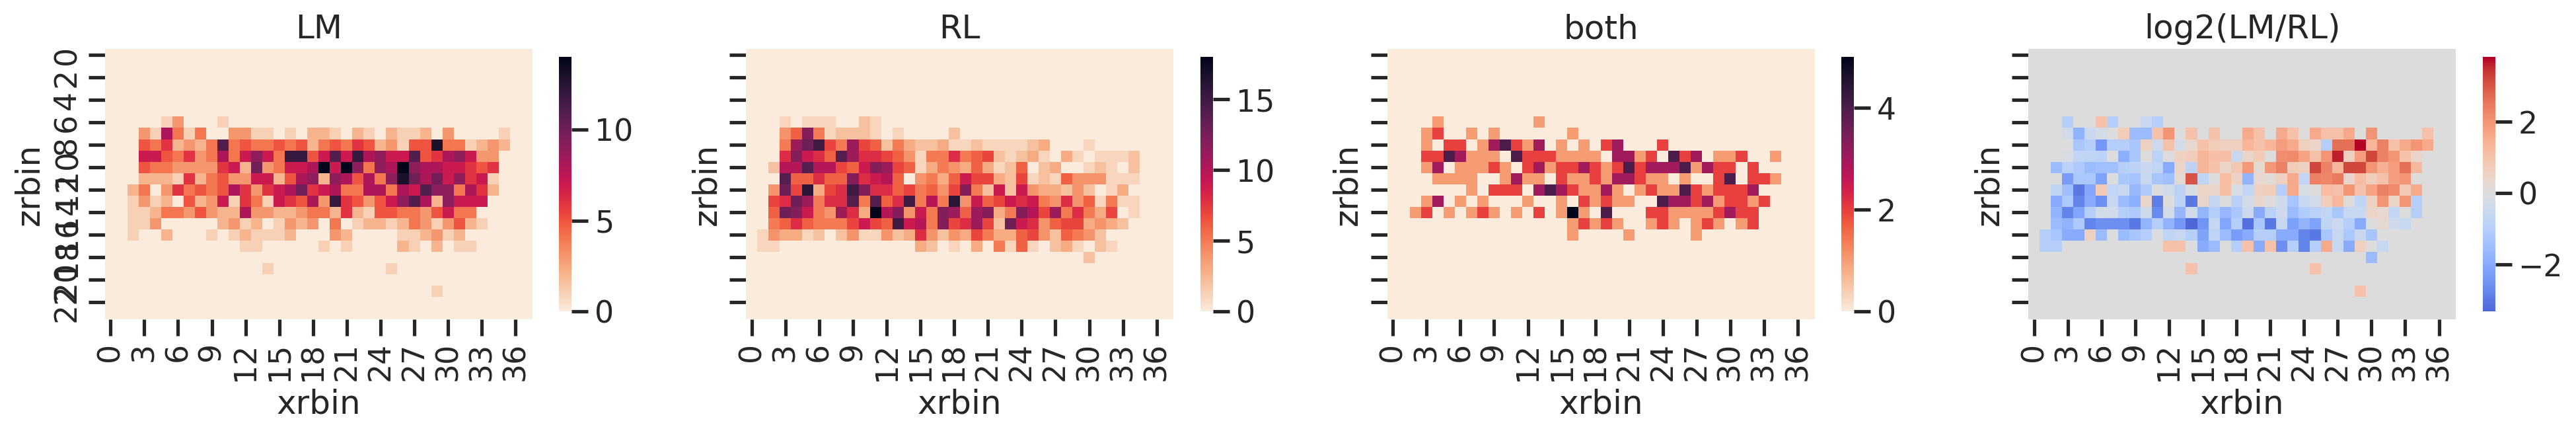

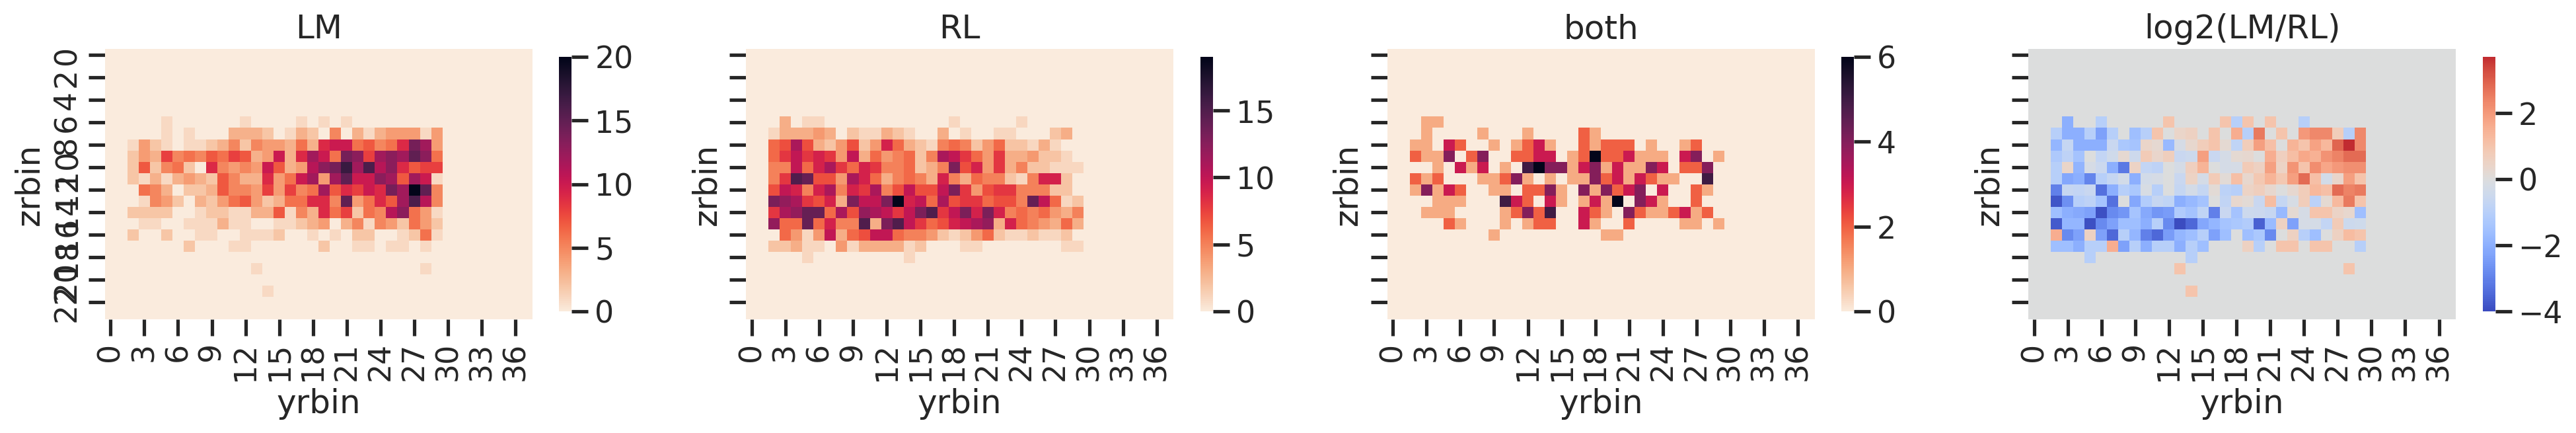

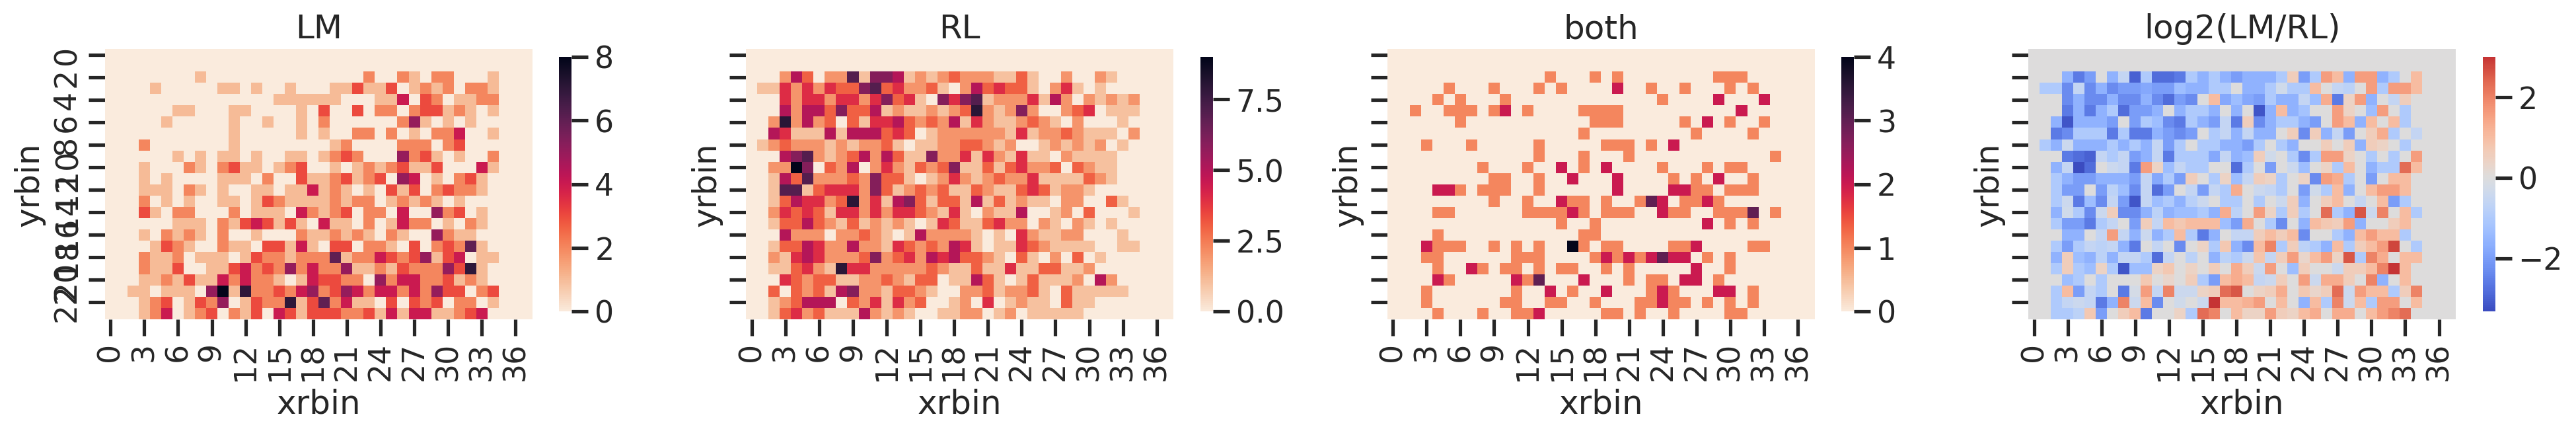

In [28]:
plot_density_maps(dfsize_xz1, dfsize_xz2, dfsize_xz3)
plot_density_maps(dfsize_yz1, dfsize_yz2, dfsize_yz3)
plot_density_maps(dfsize_xy1, dfsize_xy2, dfsize_xy3)

# at every x and y, compare z distribution

In [29]:
# dfsub = df[df['zrbin'] == 8]
# plot_easifish_proj(dfsub, 'xr', 'yr', invert_yaxis=True)
# plot_easifish_proj(dfsub, 'xr', 'zr', invert_yaxis=True)
# plot_easifish_proj(dfsub, 'yr', 'zr', invert_yaxis=True)

In [30]:
# xy
dfmean = df.groupby(['xrbin_s100', 'yrbin_s100', 'lbl_v2'])['zr'].mean().unstack().unstack() #.fillna(0).astype(int) #mean().unstack()

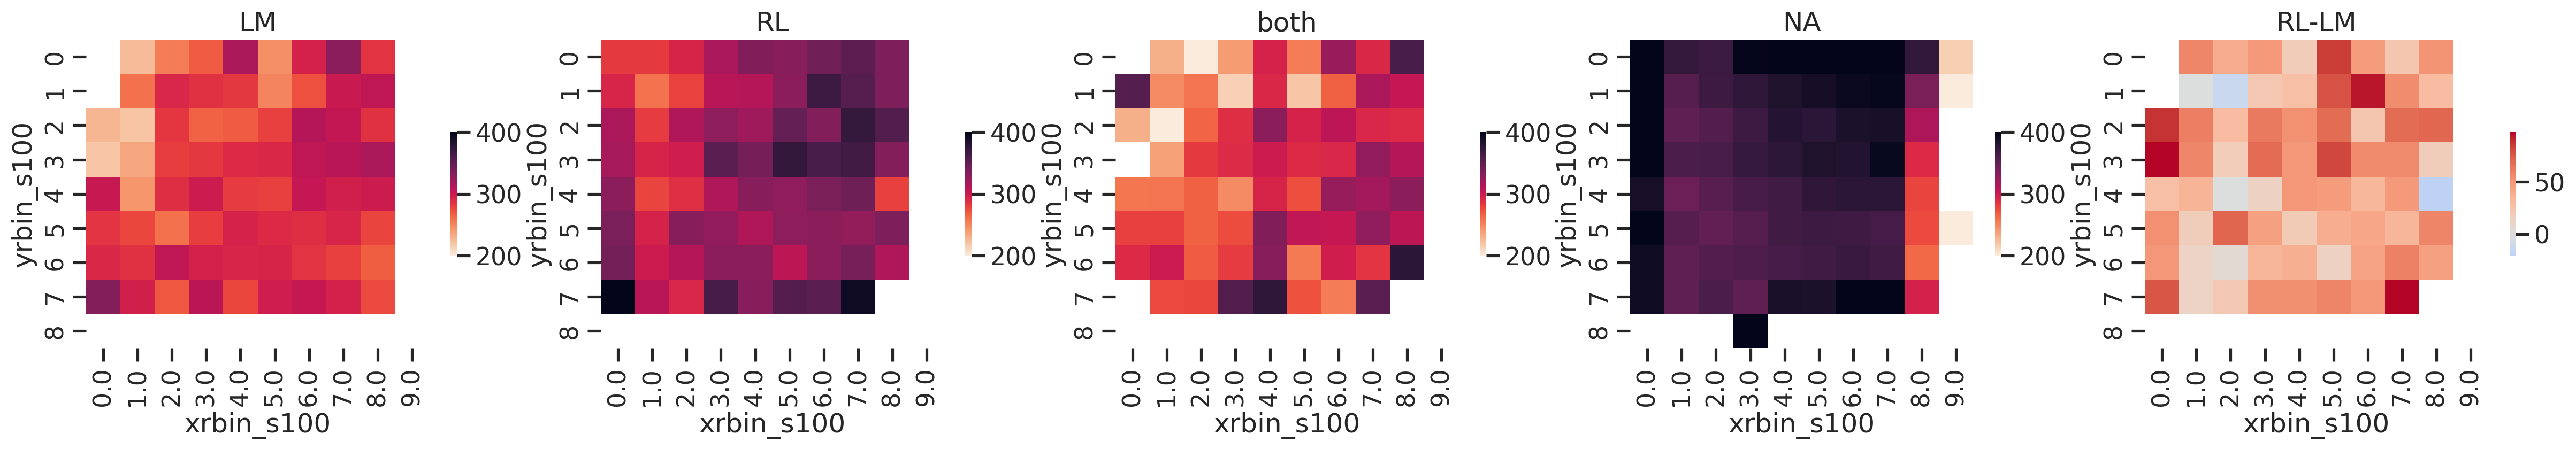

In [31]:
fig, axs = plt.subplots(1,5,figsize=(5*6,1*5))
for category, ax in zip(['LM', 'RL', 'both', 'NA'], axs):
    sns.heatmap(dfmean[category].T, 
                vmax=400, vmin=200, 
                cmap='rocket_r', cbar_kws=dict(shrink=0.3), 
                ax=ax)
    # ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(category)
    ax.grid(False)
    # ax.set_xticks([])
    # ax.set_yticks([])
ax = axs[4]
sns.heatmap(dfmean['RL'].T-dfmean['LM'].T, 
            cmap='coolwarm', cbar_kws=dict(shrink=0.3), 
            center=0,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM')
ax.grid(False)

In [32]:
# xy
dfsub = df[df['lbl_v2']!='NA'].copy()
dfsubmean = dfsub.groupby(['xrbin_s100', 'yrbin_s100', 'lbl_v2'])['zr'].mean().unstack().unstack() #.fillna(0).astype(int) #mean().unstack()
dfsubmeandiff = dfsubmean['RL']-dfsubmean['LM']


dfsubmeandiff_shuffs = []
n_rep = 1000
for i in range(n_rep): 
    dfsub['lbl_v2_shuff'] = np.random.choice(dfsub['lbl_v2'].values, size=len(dfsub), replace=False)
    dfsubmean_shuff = dfsub.groupby(['xrbin_s100', 'yrbin_s100', 'lbl_v2_shuff'])['zr'].mean().unstack().unstack() #.fillna(0).astype(int) #mean().unstack()
    dfsubmeandiff_shuffs.append(dfsubmean_shuff['RL']-dfsubmean_shuff['LM'])
dfsubmeandiff_shuffs = np.array(dfsubmeandiff_shuffs)
    
dfsubmeandiff_shuffmean = np.nanmean(dfsubmeandiff_shuffs, axis=0) # .shape

# dfsubmeandiff_shuffstd = np.nanstd(dfsubmeandiff_shuffs, axis=0) # .shape
# dfsubmeandiff_sigma = (dfsubmeandiff - dfsubmeandiff_shuffmean) /(dfsubmeandiff_shuffstd/np.sqrt(n_rep))

In [33]:
dfsubmeandiff_shuffs.shape

(1000, 9, 8)

In [34]:
pvals = (1+np.sum(np.abs(dfsubmeandiff_shuffs) > np.abs(dfsubmeandiff.values[np.newaxis,:,:]), axis=0))/n_rep
pvals

array([[0.001, 0.001, 0.008, 0.001, 0.192, 0.046, 0.106, 0.291],
       [0.047, 0.98 , 0.001, 0.004, 0.024, 0.272, 0.41 , 0.696],
       [0.085, 0.423, 0.059, 0.256, 0.967, 0.001, 0.672, 0.339],
       [0.074, 0.209, 0.001, 0.001, 0.317, 0.001, 0.056, 0.061],
       [0.656, 0.106, 0.001, 0.001, 0.001, 0.133, 0.005, 0.046],
       [0.001, 0.002, 0.001, 0.001, 0.002, 0.007, 0.347, 0.04 ],
       [0.12 , 0.001, 0.148, 0.002, 0.025, 0.008, 0.002, 0.21 ],
       [0.369, 0.003, 0.001, 0.006, 0.006, 0.025, 0.001, 0.002],
       [0.323, 0.147, 0.003, 0.55 , 0.389, 0.002, 0.041, 0.001]])

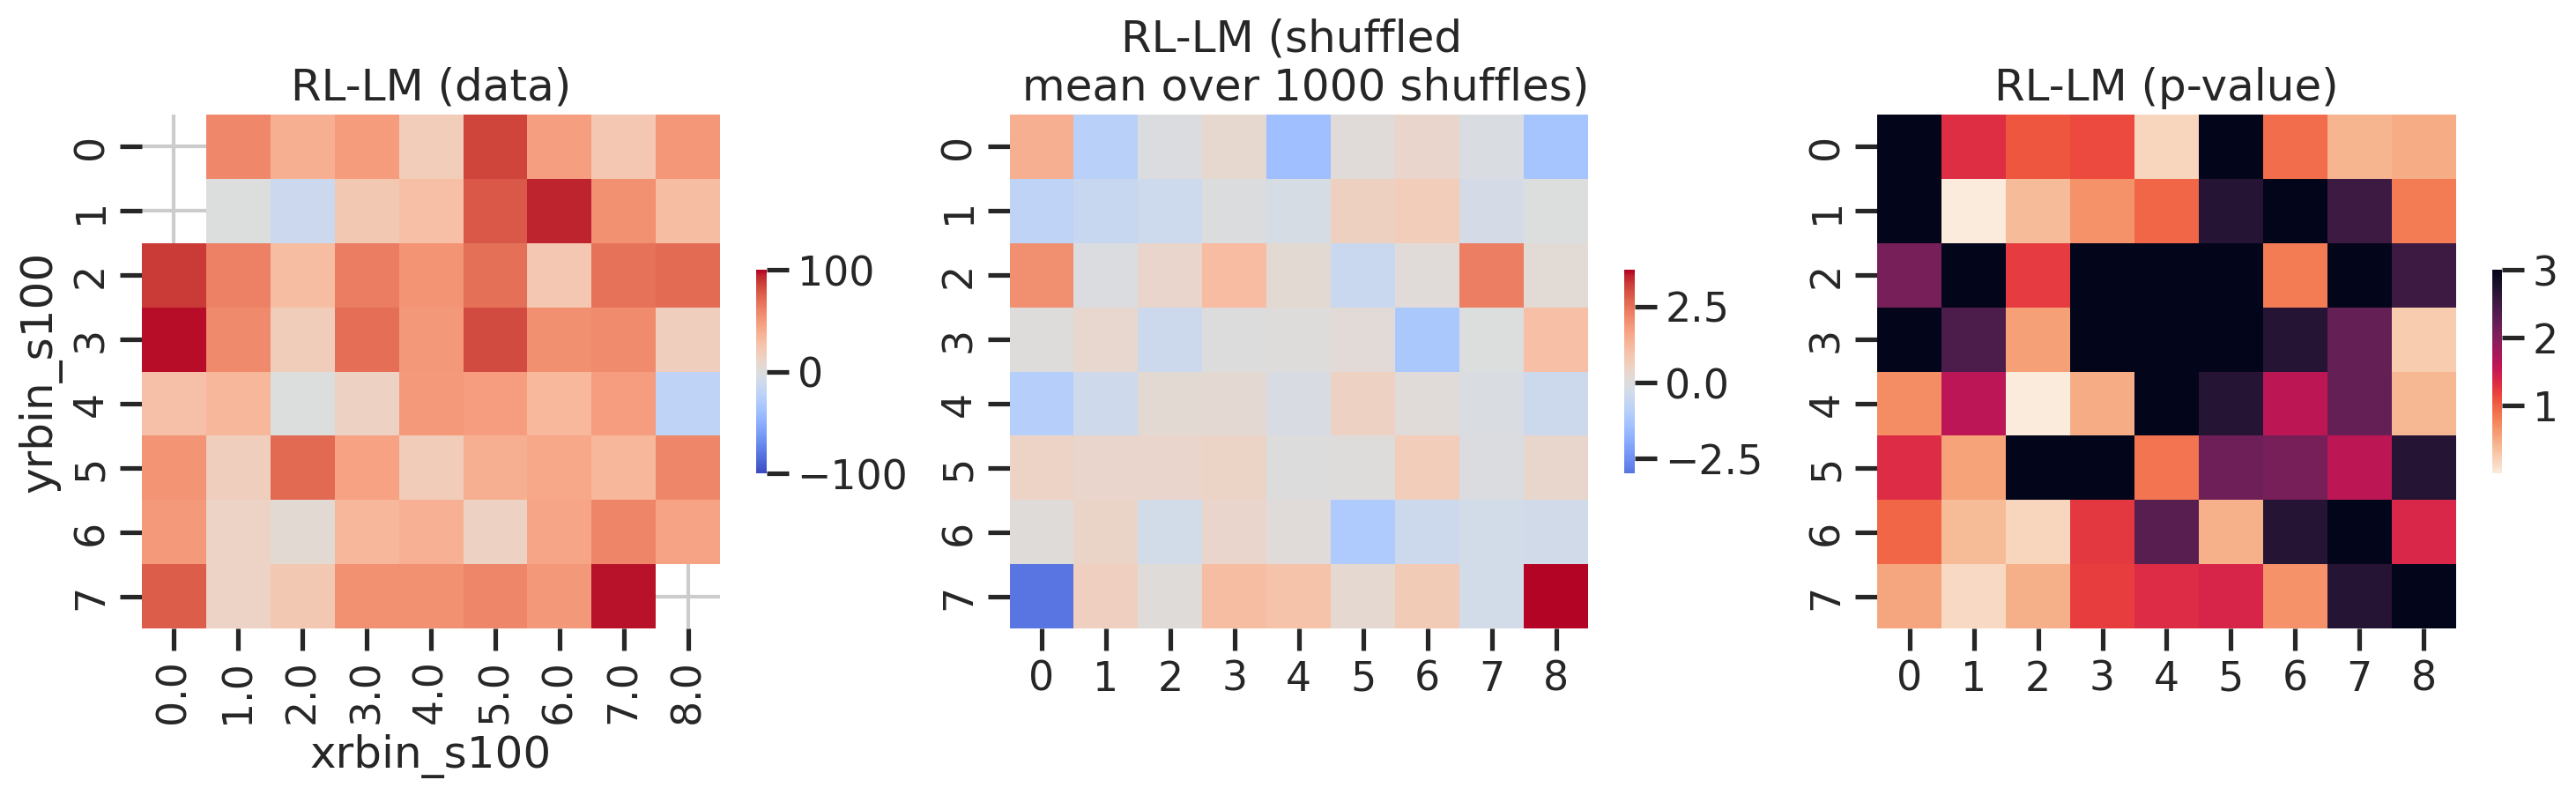

In [35]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*5))
ax = axs[0]
sns.heatmap(dfsubmeandiff.T, 
            cmap='coolwarm', cbar_kws=dict(shrink=0.3), 
            center=0, vmax=100, vmin=-100,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM (data)')

ax = axs[1]
sns.heatmap(dfsubmeandiff_shuffmean.T, 
            cmap='coolwarm', cbar_kws=dict(shrink=0.3), 
            center=0, 
            # vmax=100, vmin=-100,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM (shuffled \n mean over 1000 shuffles)')

ax = axs[2]
sns.heatmap(-np.log10(pvals).T, 
            cmap='rocket_r', cbar_kws=dict(shrink=0.3), 
            # center=0, 
            # vmax=100, vmin=-100,
            ax=ax)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_title('RL-LM (p-value)')
ax.grid(False)

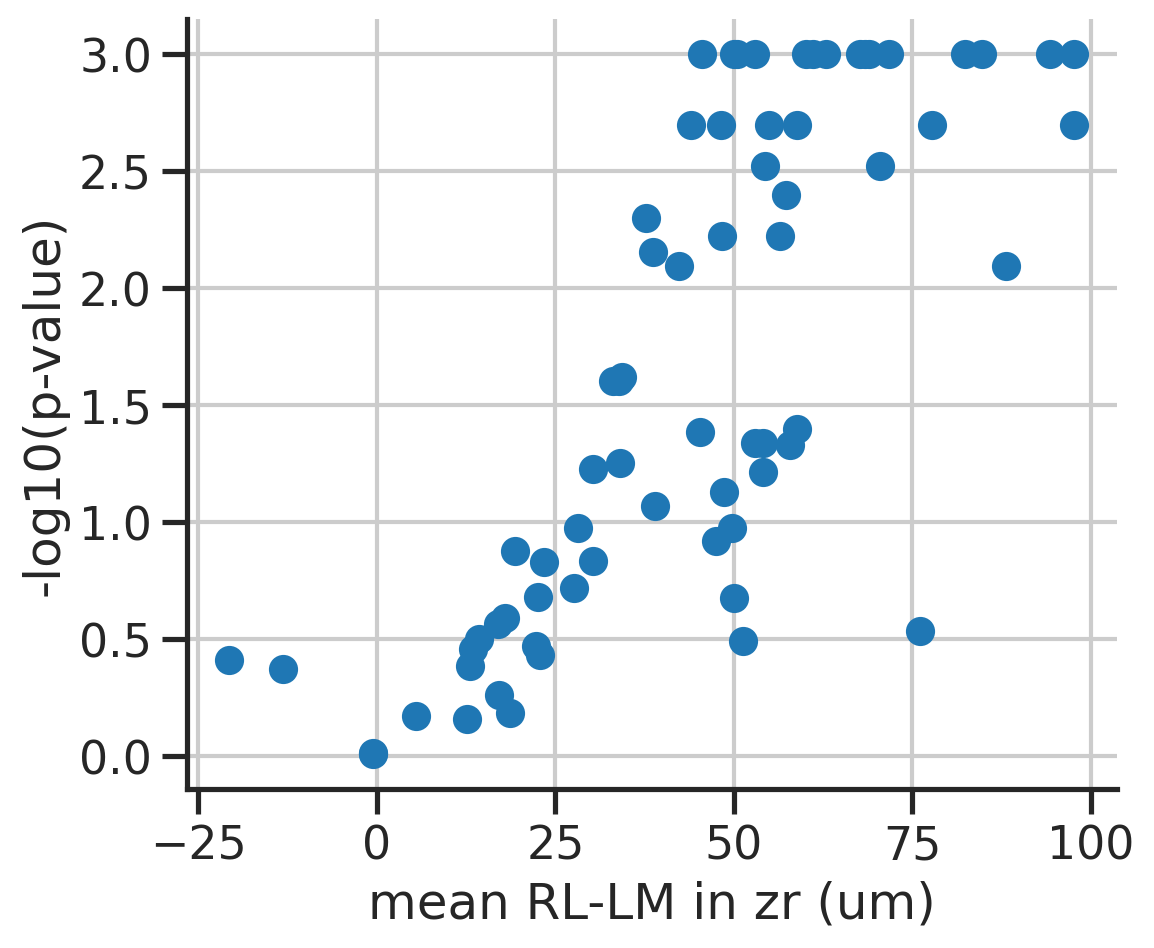

In [36]:
fig, ax = plt.subplots(1,1,figsize=(1*6,1*5))
ax.scatter(dfsubmeandiff.T, -np.log10(pvals).T)
ax.set_ylabel('-log10(p-value)')
ax.set_xlabel('mean RL-LM in zr (um)')
sns.despine(ax=ax)
plt.show()

# ax.grid(False)